# 17.电话号码的字母组合
输入：包含数字2-9的字符串  
输出：这个字符串能表示的所有字母组合，数字和字母的映射如下，1不对应任何字母  
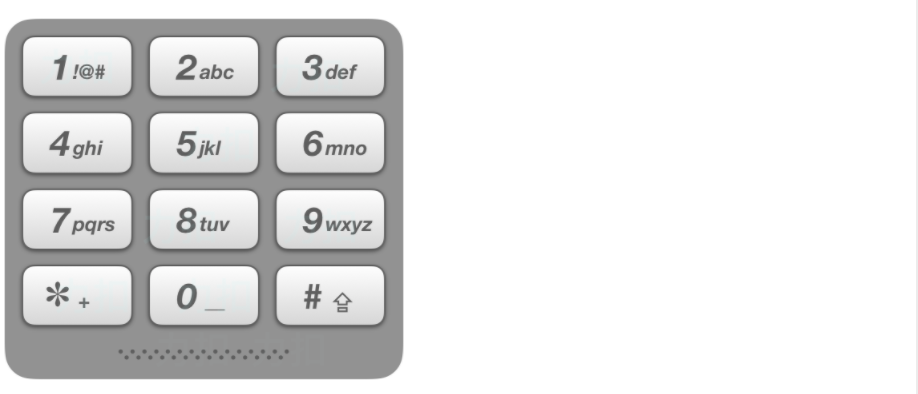  

## 思路
循环的次数和输入的字母个数相关，是无法给定的，    
典型的n个for循环问题，需要回溯法  

- 遍历树的深度等于输入字符串的长度，所有叶子节点就是需要收集的结果  
- 数字和字母是映射的关系，对应python中的数据结构是字典  
- 异常情况：可能输入1或者其他字符，面试中一定要考虑到  

## 回溯三部曲
1. 参数和返回值
   - 全局参数：收集叶子结点的字符串s，保存所有结果的数组result  
   - 其他参数：题目给定的输入字符串string，用来指示遍历到第几个数字的index  

2. 终止条件
   - 还是递归到叶子节点就需要终止了  
   - 叶子节点：index == 输入字符串中的数字个数  

3. 单层遍历逻辑
   - 节点处理 - 递归遍历 - 回溯撤销
   - 取当前index指向的字符串中的数字，并取到数字映射的字母集合  
   - 然后遍历取出的字母集合，开始处理-递归-回溯 的模板

In [ ]:
class Solution:
    def __init__(self):
        self.letterMap = [
            "",     # 0，异常情况
            "",     # 1，异常情况
            "abc",  # 2
            "def",  # 3
            "ghi",  # 4
            "jkl",  # 5
            "mno",  # 6
            "pqrs", # 7
            "tuv",  # 8
            "wxyz"  # 9
        ]
    
        self.s = ""          # 定义全局参数
        self.result = []

    def backtracing(self, digits, index):
        if index == len(digits):   # 已经遍历完所有的数字，加入结果数组
            self.result.append(self.s)
            return
        digit = int(digits[index])   # 取出当前索引对应的数字并转换为整数
        letters = self.letterMap[digit]
        for i in range(len(letters)):
            self.s += letters[i]   # 处理字符
            self.backtracing(digits, index + 1)   # 递归遍历，index+1 处理下一个数字
            self.s = self.s[:-1]   # 回溯：删除最后添加的字符
    
    def letterCombinations(self, digits):
        if len(digits) == 0:
            return self.result
        self.backtracing(digits, 0)
        return self.result